# Методология ведения DS-проектов

# 1. Business Understanding / Этап бизнес-анализа

## 1.1 Цель 

Предсказать качество вина, основываясь только на его физико-химических свойствах

## 1.2 Описание

Представлены данные по красному и белому португальскому вину "Vinho Verde". Из-за конфиденциальности и логистики 
представлены данные только о физико-химических свойствах, то есть нет информации о сорте винограда, марке вина,
цене продажи вина и тд. 
Данный датасет можно рассматривать, как задачу классификации или регрессии. Классы упорядочены и несбалансированы
(средних вин будет больше, чем отличных и плохих).
Подробнее можно узнать на [Cortez et al., 2009] или [на kaggle](https://www.kaggle.com/rajyellow46/wine-quality)


# 2. Data Understanding / Анализ данных

## 2.1 Подключение библиотек

In [1]:
import numpy as np
import pandas as pd

In [2]:
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline

In [3]:
import warnings
warnings.filterwarnings("ignore")

## 2.2 Загрузка датасета

In [4]:
df = pd.read_csv('winequalityN.csv')
df.tail()

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
6492,red,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
6493,red,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,NaN,11.2,6
6494,red,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
6495,red,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5
6496,red,6.0,0.310,0.47,3.6,0.067,18.0,42.0,0.99549,3.39,0.66,11.0,6


Входные переменные (основаны на физико-химических тестах):
* fixed acidity
* volatile acidity
* citric acid
* residual sugar
* chlorides
* free sulfur dioxide
* total sulfur dioxide
* density
* pH
* sulphates
* alcohol

Выходная переменная:
* quality (в пределах от 0 до 10)

## 2.3 Предварительный анализ датасета

In [5]:
df.shape

(6497, 13)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
type                    6497 non-null object
fixed acidity           6487 non-null float64
volatile acidity        6489 non-null float64
citric acid             6494 non-null float64
residual sugar          6495 non-null float64
chlorides               6495 non-null float64
free sulfur dioxide     6497 non-null float64
total sulfur dioxide    6497 non-null float64
density                 6497 non-null float64
pH                      6488 non-null float64
sulphates               6493 non-null float64
alcohol                 6497 non-null float64
quality                 6497 non-null int64
dtypes: float64(11), int64(1), object(1)
memory usage: 659.9+ KB


In [7]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,6487.000000,6489.000000,6494.000000,6495.000000,6495.000000,6497.000000,6497.000000,6497.000000,6488.000000,6493.000000,6497.000000,6497.000000
mean,7.216579,0.339691,0.318722,5.444326,0.056042,30.525319,115.744574,0.994697,3.218395,0.531215,10.491801,5.818378
std,1.296750,0.164649,0.145265,4.758125,0.035036,17.749400,56.521855,0.002999,0.160748,0.148814,1.192712,0.873255
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,5.000000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,6.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000


In [8]:
df['type'].describe()

count      6497
unique        2
top       white
freq       4898
Name: type, dtype: object

In [9]:
df.corr()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,0.220172,0.323736,-0.112319,0.298421,-0.283317,-0.329747,0.459204,-0.251814,0.300380,-0.095603,-0.077031
volatile acidity,0.220172,1.000000,-0.378061,-0.196702,0.377167,-0.353230,-0.414928,0.271193,0.260660,0.225476,-0.038248,-0.265953
citric acid,0.323736,-0.378061,1.000000,0.142486,0.039315,0.133437,0.195218,0.096320,-0.328689,0.057613,-0.010433,0.085706
residual sugar,-0.112319,-0.196702,0.142486,1.000000,-0.128902,0.403439,0.495820,0.552498,-0.267050,-0.185745,-0.359706,-0.036825
chlorides,0.298421,0.377167,0.039315,-0.128902,1.000000,-0.195042,-0.279580,0.362594,0.044806,0.395332,-0.256861,-0.200886
free sulfur dioxide,-0.283317,-0.353230,0.133437,0.403439,-0.195042,1.000000,0.720934,0.025717,-0.145191,-0.188489,-0.179838,0.055463
total sulfur dioxide,-0.329747,-0.414928,0.195218,0.495820,-0.279580,0.720934,1.000000,0.032395,-0.237687,-0.275381,-0.265740,-0.041385
density,0.459204,0.271193,0.096320,0.552498,0.362594,0.025717,0.032395,1.000000,0.011920,0.259454,-0.686745,-0.305858
pH,-0.251814,0.260660,-0.328689,-0.267050,0.044806,-0.145191,-0.237687,0.011920,1.000000,0.191248,0.121002,0.019366
sulphates,0.300380,0.225476,0.057613,-0.185745,0.395332,-0.188489,-0.275381,0.259454,0.191248,1.000000,-0.003261,0.038729


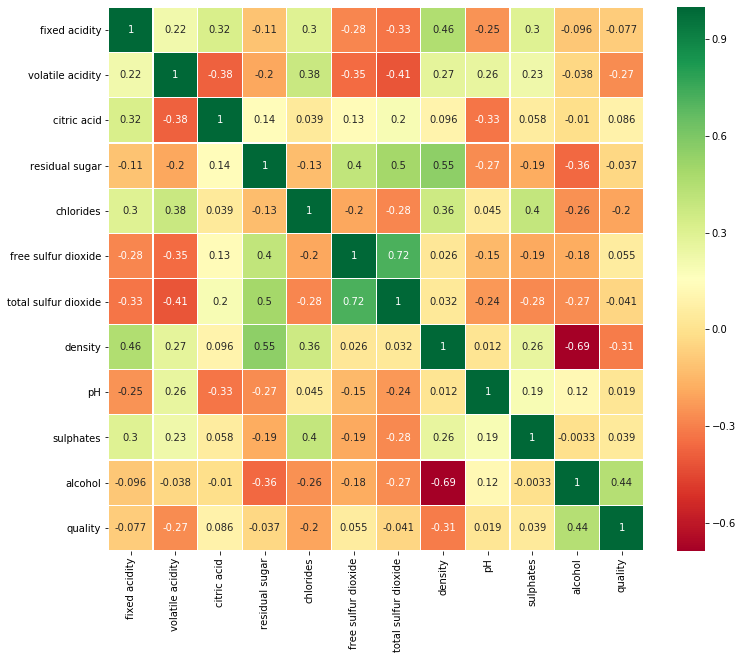

In [10]:
sns.heatmap(df.corr(),annot=True,cmap='RdYlGn',linewidths=0.2)
fig=plt.gcf()
fig.set_size_inches(12, 10)
plt.show()

# 3. Data Preparation / Подготовка данных

## 3.1 Обработка категориальных переменных

In [11]:
df.type.value_counts()

white    4898
red      1599
Name: type, dtype: int64

In [12]:
df.type = df.type.replace(to_replace=['white', 'red'], value=[1, 0])
df.head()

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,1,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,1,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,1,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,1,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


## 3.2 Обработка выбросов

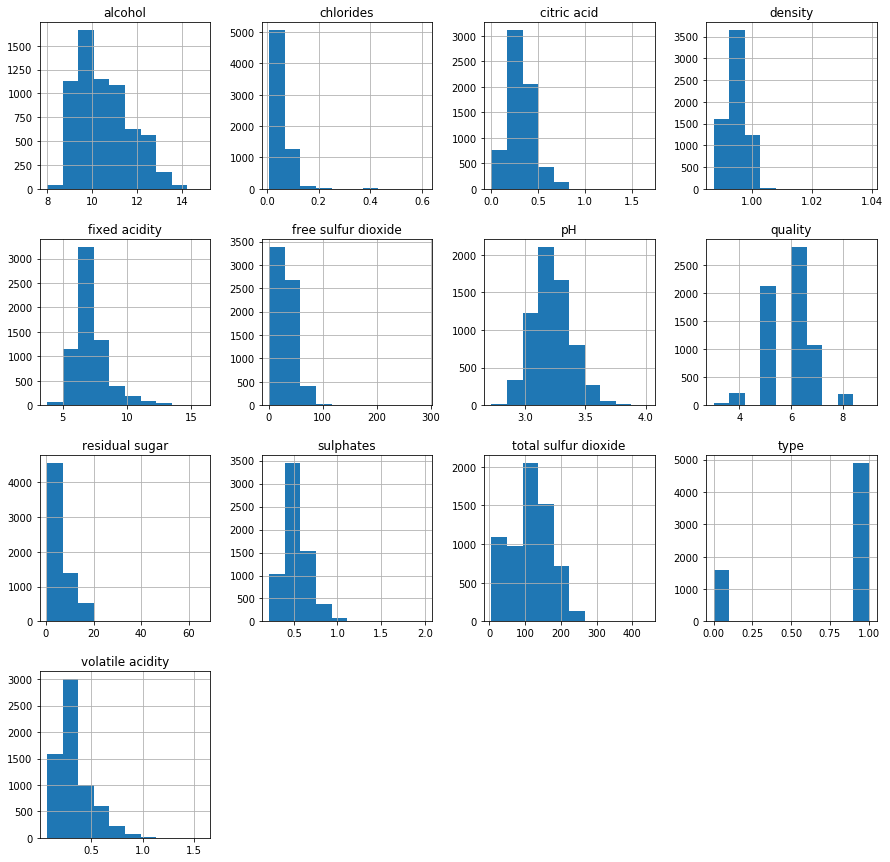

In [13]:
df.hist(figsize=(15,15))
plt.show()

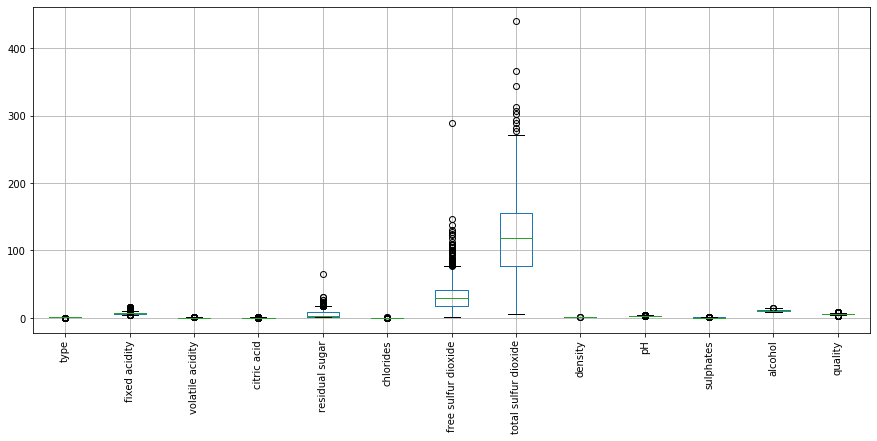

In [14]:
df.boxplot(figsize=(15,6), rot=90)

In [15]:
low = .01
high = .95
quant_df = df.quantile([low, high])

In [16]:
df = df[df['total sulfur dioxide'] < quant_df.loc[high,'total sulfur dioxide']]

In [17]:
df = df[df['free sulfur dioxide'] < quant_df.loc[high,'free sulfur dioxide']]

In [18]:
df = df[df['residual sugar'] < quant_df.loc[high,'residual sugar']]

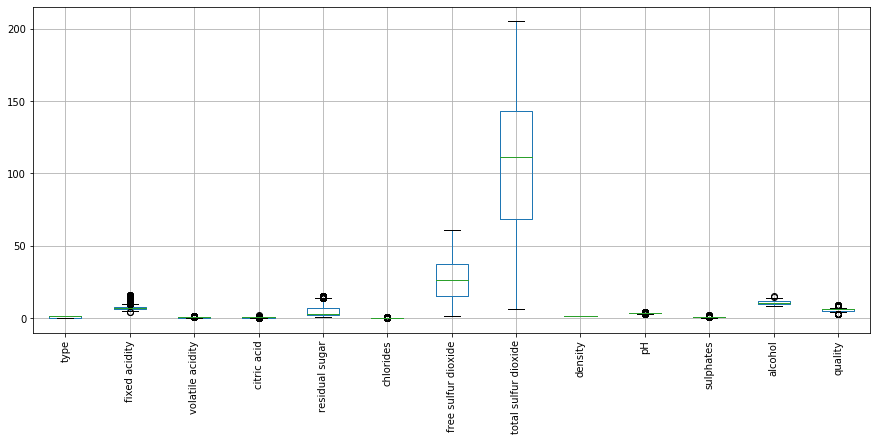

In [19]:
boxplot = df.boxplot(figsize=(15,6), rot=90)

## 3.3 Работа с пропущенными значениями

In [20]:
df.isna().sum()

type                    0
fixed acidity           8
volatile acidity        7
citric acid             2
residual sugar          0
chlorides               2
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      7
sulphates               4
alcohol                 0
quality                 0
dtype: int64

In [21]:
df = df.dropna()

In [22]:
df.shape

(5617, 13)

## 3.4 Обработка целевой переменной

In [23]:
df.quality.value_counts()

6    2443
5    1768
7    1006
4     198
8     176
3      21
9       5
Name: quality, dtype: int64

In [24]:
rename = { 3 : 0, 4 : 0, 5: 1, 6 : 1, 7: 1, 8 : 2, 9 : 2}
df['quality'] =  df['quality'].map(rename)

In [25]:
df.quality.value_counts()

1    5217
0     219
2     181
Name: quality, dtype: int64

## 3.5 Масштабирование данных

In [26]:
y = df['quality']

In [27]:
X = df[df.columns[:-1]]

In [28]:
from sklearn.preprocessing import StandardScaler

In [29]:
scaler = StandardScaler()

In [30]:
scaler.fit(X)

StandardScaler()

In [31]:
X_scaled = scaler.transform(X)

## 3.6 Разделение данных на train и test

In [32]:
from sklearn.model_selection import train_test_split

In [33]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size = 0.3)

In [34]:
X_train.shape, y_train.shape

((3931, 12), (3931,))

In [35]:
X_test.shape, y_test.shape

((1686, 12), (1686,))

# 4 Modeling / Моделирование

In [36]:
from sklearn.neighbors import KNeighborsClassifier

In [37]:
from sklearn.model_selection import GridSearchCV

In [38]:
grid_params = {'n_neighbors': list(range(1, 30))}

In [39]:
knn = GridSearchCV(KNeighborsClassifier(), param_grid=grid_params, cv=10, scoring = 'accuracy')
knn.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                         13, 14, 15, 16, 17, 18, 19, 20, 21, 22,
                                         23, 24, 25, 26, 27, 28, 29]},
             scoring='accuracy')

In [40]:
y_pred = knn.best_estimator_.predict(X_test)

## 5. Evaluation / Оценка

In [41]:
from sklearn.metrics import accuracy_score

In [42]:
print('Accuracy-score на тестовом наборе: {:.3f}'.format(accuracy_score(y_test, y_pred)))
print('Наилучшие значения параметров: {}'.format(knn.best_params_))
print('Наилучшее значение кросс-валид.: {:.3f}'.format(knn.best_score_))
print('Наилучшая модель: {}'.format(knn.best_estimator_))

Accuracy-score на тестовом наборе: 0.929
Наилучшие значения параметров: {'n_neighbors': 18}
Наилучшее значение кросс-валид.: 0.929
Наилучшая модель: KNeighborsClassifier(n_neighbors=18)


## 6. Deployment / Внедрение

In [43]:
y_test = knn.predict(X_test)
test = pd.DataFrame( { 'type': X_test[:, 0], 'fixed acidity': X_test[:, 1], 'volatile acidity': X_test[:, 2], 
        'citric acid': X_test[:, 3],
       'residual sugar': X_test[:, 4], 'chlorides': X_test[:, 5], 'free sulfur dioxide': X_test[:, 6],
       'total sulfur dioxide': X_test[:, 7], 'density': X_test[:, 8], 'pH': X_test[:, 9], 
        'sulphates': X_test[:, 10], 'alcohol': X_test[:, 11], 'quality': y_test } )
test.shape
test.head()
test.to_csv('wine_pred.csv', index = False)